<a href="https://colab.research.google.com/github/jjefferson2006/DSWP_JJ_altera/blob/main/desafio_churn_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###carregar dados


In [2]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/train.csv'
df_churn_train = pd.read_csv(url)
df_churn_train

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [3]:
df_churn_train_copy = df_churn_train.copy()

In [4]:
df_churn_train_copy

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [5]:
#Normalizar as colunas
df_churn_train.columns = [col.lower() for col in df_churn_train.columns]
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


 **'id':'id',     'gender':'genero',    'SeniorCitizen':'Idoso', 
 
  'Partner':'TemParceiro',      'Dependents':'TemDependentes',

  'tenure':'MesesNaCompanhia',     'PhoneService':'TemTelefone',

   'MultipleLines':'MaisLinhas',    'InternetService':'TemInternet',

    'OnlineSecurity':'ServicoSegurancaOnline',   

    'OnlineBackup':'ServicoBackupOnline',

    'DeviceProtection':'ServicoProtecaoOnline',

    'TechSupport':'ServicoSuporteOnline',

    'StreamingTV':'ServicoTV',

    'StreamingMovies':'ServicoPctFilmes',

    'Contract':'Contrato',

    'PaperlessBilling':'ContaOnline',

    'PaymentMethod':'MetodoPagamento',

    'MonthlyCharges':'CobrancaMensal',

    'TotalCharges':'CobrancaTotal',

    'Churn':'Churn'**


In [6]:
#contar a variavel target
df_churn_train['churn'].value_counts()

0    4139
1    1495
Name: churn, dtype: int64

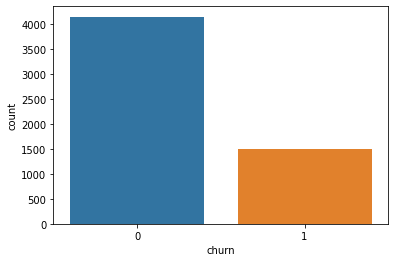

In [7]:
sns.countplot( x ='churn', data = df_churn_train)

In [8]:
#percentagem de 0 e 1 da variavel target
df_churn_train['churn'].value_counts()/df_churn_train.shape[0]*100

0    73.464679
1    26.535321
Name: churn, dtype: float64

In [9]:
#(linhas, colunas) do df
df_churn_train.shape


(5634, 21)

### Missing Values

In [10]:
df_churn_train.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents          218
tenure              461
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
monthlycharges        0
totalcharges          0
churn                 0
dtype: int64

In [11]:
df_churn_train.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

###Analise da tenure

Text(0.5, 1.0, 'box tenure')

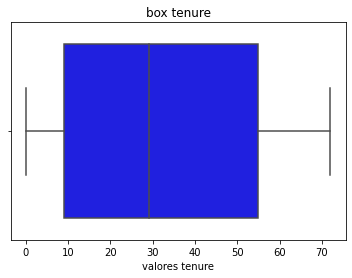

In [12]:
#plota usando o Seaborn, dod 3 missing somente tenure é float

plt.subplot(1,1, 1)
fig = sns.boxplot(x = 'tenure', data = df_churn_train, orient= 'h', color = 'b')
fig.set_xlabel('valores tenure')
fig.set_title('box tenure')



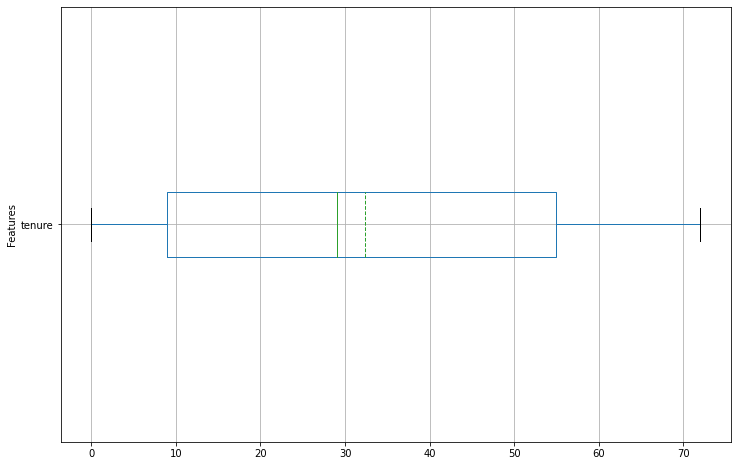

In [13]:
#tenure não tem outliers 
df_churn_train[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [14]:
df_churn_train['tenure']

0       56.0
1        NaN
2       60.0
3       37.0
4       29.0
        ... 
5629    43.0
5630     NaN
5631    28.0
5632    63.0
5633    38.0
Name: tenure, Length: 5634, dtype: float64

In [15]:
df_churn_train['tenure'].isna().sum()

461

In [16]:
#os isna na tenure 8,18%, substiuir pela mean()
df_churn_train['tenure'].isna().sum()/df_churn_train.shape[0]*100

8.182463613773518

In [17]:
df_churn_train['tenure'].mean()

32.332882273342356

In [18]:
df_churn_train[['tenure']].describe()

,tenure
count,5173.000000
mean,32.332882
std,24.463607
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [19]:
#29(53); 9 (81); 55(48), substutir por 27
mp_q = (9*81+29*53+55*48)/(53+81+48)
mp_q
                    

26.956043956043956

In [20]:
df_churn_train[df_churn_train['tenure']==55].count()

id                  48
gender              48
seniorcitizen       48
partner             48
dependents          46
tenure              48
phoneservice        48
multiplelines       48
internetservice     48
onlinesecurity      48
onlinebackup        48
deviceprotection    48
techsupport         48
streamingtv         48
streamingmovies     48
contract            48
paperlessbilling    48
paymentmethod       48
monthlycharges      48
totalcharges        48
churn               48
dtype: int64

In [21]:
#substituição dos na por mp-q
df_churn_train['tenure'].fillna(mp_q, inplace = True)

In [22]:
df_churn_train[df_churn_train['tenure'].isna()]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [23]:
#checa o describe apos o trata na
df_churn_train[['tenure']].describe()

,tenure
count,5634.000000
mean,31.892924
std,23.487493
min,0.000000
25%,10.000000
50%,26.956044
75%,53.000000
max,72.000000


**tratar os dependentes**

In [41]:
df_churn_train[['dependents']]

,dependents
0,No
1,Yes
2,No
3,No
4,Yes
...,...
5629,No
5630,No
5631,No
5632,Yes


In [46]:
#conta os No e Yes
df_churn_train[['dependents']].value_counts()

dependents
No            3793
Yes           1623
dtype: int64

In [49]:
#calcula a % excluindo os na
df_churn_train[['dependents']].value_counts()/(df_churn_train.shape[0]-218)*100

dependents
No            70.033235
Yes           29.966765
dtype: float64

In [61]:
dependents_na = df_churn_train['dependents'].isna().sum()
dependents_na

218

In [75]:
dependents_na/df_churn_train.shape[0]*100

3.8693645722399714

In [58]:
na_70_no = dependents_na*0.7
na_70_no

152.6

In [60]:
na_30_yes = dependents_na*0.3
na_30_yes

65.39999999999999

In [55]:
dependents_NaN = df_churn_train[df_churn_train['dependents'].isna()]
dependents_NaN

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
73,139,Male,0,No,NaN,57.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.60,1170.55,0
89,3485,Female,1,Yes,NaN,38.0,Yes,No,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.45,3147.15,0
110,5091,Male,1,Yes,NaN,7.0,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.70,673.1,1
156,6188,Male,0,Yes,NaN,8.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,165.5,0
179,806,Female,0,Yes,NaN,72.0,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),76.80,5468.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,981,Female,0,No,NaN,20.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.50,413,0
5522,3761,Male,0,No,NaN,3.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),73.60,232.5,0
5541,795,Female,0,No,NaN,6.0,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic),45.00,298.7,0
5558,4154,Male,0,No,NaN,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.30,595.05,0


In [77]:
df_churn_train['dependents'][73]

nan

###testando o prenchimento do NaN na coluna dependents

In [83]:
#criar uma lista dos index nan na feature dependents
l_index_na_dep = list(df_churn_train[df_churn_train['dependents'].isna()].index)
l_index_na_dep

[73,
 89,
 110,
 156,
 179,
 222,
 287,
 293,
 301,
 324,
 335,
 337,
 394,
 492,
 496,
 522,
 545,
 546,
 574,
 636,
 698,
 726,
 807,
 815,
 835,
 845,
 879,
 898,
 901,
 978,
 980,
 991,
 1000,
 1017,
 1047,
 1056,
 1061,
 1063,
 1096,
 1104,
 1183,
 1188,
 1208,
 1222,
 1315,
 1318,
 1367,
 1393,
 1427,
 1446,
 1461,
 1473,
 1483,
 1507,
 1512,
 1545,
 1572,
 1576,
 1578,
 1618,
 1649,
 1670,
 1694,
 1755,
 1757,
 1769,
 1801,
 1851,
 1864,
 1990,
 1997,
 1998,
 2019,
 2028,
 2046,
 2057,
 2095,
 2097,
 2098,
 2102,
 2116,
 2123,
 2128,
 2156,
 2169,
 2197,
 2213,
 2268,
 2311,
 2316,
 2335,
 2339,
 2386,
 2394,
 2446,
 2448,
 2458,
 2462,
 2484,
 2487,
 2503,
 2507,
 2510,
 2553,
 2575,
 2620,
 2648,
 2687,
 2694,
 2727,
 2733,
 2734,
 2736,
 2752,
 2754,
 2758,
 2763,
 2785,
 2832,
 2833,
 2839,
 2840,
 2889,
 2920,
 2933,
 2964,
 3056,
 3115,
 3127,
 3144,
 3164,
 3166,
 3184,
 3199,
 3252,
 3266,
 3284,
 3286,
 3288,
 3414,
 3419,
 3440,
 3458,
 3526,
 3556,
 3584,
 3587,
 3600

In [87]:
len(l_index_na_dep)

218

In [89]:
df_dep_tra = df_churn_train[['dependents']].copy()
df_dep_tra

,dependents
0,No
1,Yes
2,No
3,No
4,Yes
...,...
5629,No
5630,No
5631,No
5632,Yes


In [92]:
d = 0
for c in l_index_na_dep:
    df_dep_tra['dependents'][c] = 'No'
    d = d + 1
    if  d >= 153:
       df_dep_tra['dependents'][c] = 'Yes'  


In [94]:
df_dep_tra.isna().sum()

dependents    0
dtype: int64

In [96]:
df_dep_tra[['dependents']].value_counts()/df_dep_tra.shape[0]

dependents
No            0.700213
Yes           0.299787
dtype: float64

In [56]:
#ajuste No em 70% e Yes em 30%
df_churn_train['dependents'].isna()


0       False
1       False
2       False
3       False
4       False
        ...  
5629    False
5630    False
5631    False
5632    False
5633    False
Name: dependents, Length: 5634, dtype: bool

In [97]:
#tratamento da feature dependents
s = 0
for c in l_index_na_dep:
    df_churn_train['dependents'][c] = 'No'
    s = s + 1
    if  s >= 153:
       df_dep_tra['dependents'][c] = 'Yes'  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

###tratamento da paymentmethod

In [100]:
df_churn_train[['paymentmethod']].value_counts()

paymentmethod            
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
dtype: int64

In [101]:
df_churn_train['paymentmethod'].isna().sum()

99

In [102]:
df_churn_train['paymentmethod'].shape[0]

5634

In [107]:
df_churn_train[['paymentmethod']].value_counts()/(df_churn_train['paymentmethod'].shape[0]-99)*100

paymentmethod            
Electronic check             34.092141
Mailed check                 22.981030
Bank transfer (automatic)    21.897019
Credit card (automatic)      21.029810
dtype: float64

In [104]:
99/5634*100

1.7571884984025559

In [111]:
#elect = 33
99*0.34

33.660000000000004

In [113]:
#mail = 23
99*0.2298

22.7502

In [114]:
#bank = 22
99*0.2189

21.671100000000003

In [116]:
#cc = 21
99*0.21


20.79

In [117]:
l_index_na_pay = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_na_pay

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [132]:
df_churn_train['paymentmethod']

0                             NaN
1                    Mailed check
2         Credit card (automatic)
3       Bank transfer (automatic)
4                Electronic check
                  ...            
5629             Electronic check
5630             Electronic check
5631    Bank transfer (automatic)
5632                 Mailed check
5633    Bank transfer (automatic)
Name: paymentmethod, Length: 5634, dtype: object

In [134]:
df_churn_train[['paymentmethod']].value_counts()

paymentmethod            
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
dtype: int64

In [135]:
df_churn_train[['paymentmethod', 'gender']].value_counts()

paymentmethod              gender
Electronic check           Male      963
                           Female    924
Mailed check               Male      657
Bank transfer (automatic)  Female    637
Mailed check               Female    615
Credit card (automatic)    Male      605
Bank transfer (automatic)  Male      575
Credit card (automatic)    Female    559
dtype: int64

In [150]:
df_tra_pay = df_churn_train[df_churn_train['paymentmethod'].isna()]
df_tra_pay

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.000000,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
59,5899,Female,0,Yes,Yes,33.000000,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,NaN,24.15,800.3,0
196,5036,Male,0,No,No,20.000000,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,NaN,78.80,1641.3,0
247,704,Female,0,No,No,26.956044,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,NaN,20.55,33.6,0
337,5747,Female,0,No,No,10.000000,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,NaN,81.00,818.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325,5150,Female,0,No,No,62.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,NaN,19.20,1123.65,0
5398,6004,Female,0,Yes,No,71.000000,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,NaN,93.20,6506.15,0
5470,2276,Male,0,Yes,Yes,1.000000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,NaN,74.50,74.5,1
5484,6869,Male,0,No,No,13.000000,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,NaN,91.10,1135.7,1


In [157]:
df_tra_pay[['paymentmethod', 'gender']]

Series([], dtype: int64)

In [ ]:
#tratamento da feature dependents
s = 0
for c in l_index_na_pay:
    if
    df_churn_train['dependents'][c] = 'No'
    s = s + 1
    if  s >= 153:
       df_dep_tra['dependents'][c] = 'Yes'